In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df_details = pd.read_json('IMDB_movie_details.json', lines=True)

In [15]:
df_details

,movie_id,plot_summary,duration,genre,rating,release_date,plot_synopsis
0,tt0105112,"Former CIA analyst, Jack Ryan is in England wi...",1h 57min,"[Action, Thriller]",6.9,1992-06-05,"Jack Ryan (Ford) is on a ""working vacation"" in..."
1,tt1204975,"Billy (Michael Douglas), Paddy (Robert De Niro...",1h 45min,[Comedy],6.6,2013-11-01,Four boys around the age of 10 are friends in ...
2,tt0243655,"The setting is Camp Firewood, the year 1981. I...",1h 37min,"[Comedy, Romance]",6.7,2002-04-11,
3,tt0040897,"Fred C. Dobbs and Bob Curtin, both down on the...",2h 6min,"[Adventure, Drama, Western]",8.3,1948-01-24,Fred Dobbs (Humphrey Bogart) and Bob Curtin (T...
4,tt0126886,Tracy Flick is running unopposed for this year...,1h 43min,"[Comedy, Drama, Romance]",7.3,1999-05-07,Jim McAllister (Matthew Broderick) is a much-a...
...,...,...,...,...,...,...,...
1567,tt0289879,Evan Treborn grows up in a small town with his...,1h 53min,"[Sci-Fi, Thriller]",7.7,2004-01-23,"In the year 1998, Evan Treborn (Ashton Kutcher..."
1568,tt1723811,Brandon is a 30-something man living in New Yo...,1h 41min,[Drama],7.2,2012-01-13,"Brandon (Michael Fassbender) is a successful, ..."
1569,tt5013056,Evacuation of Allied soldiers from the British...,1h 46min,"[Action, Drama, History]",8.1,2017-07-21,The film alternates between three different pe...
1570,tt0104014/,"For a while now, beautiful 24-year-old Diana B...",1h 33min,"[Comedy, Drama]",5.3,1992-02-21,


In [16]:
df_reviews = pd.read_json('IMDB_reviews.json', lines=True)

In [17]:
df_reviews

,review_date,movie_id,user_id,is_spoiler,review_text,rating,review_summary
0,10 February 2006,tt0111161,ur1898687,True,"In its Oscar year, Shawshank Redemption (writt...",10,A classic piece of unforgettable film-making.
1,6 September 2000,tt0111161,ur0842118,True,The Shawshank Redemption is without a doubt on...,10,Simply amazing. The best film of the 90's.
2,3 August 2001,tt0111161,ur1285640,True,I believe that this film is the best story eve...,8,The best story ever told on film
3,1 September 2002,tt0111161,ur1003471,True,"**Yes, there are SPOILERS here**This film has ...",10,Busy dying or busy living?
4,20 May 2004,tt0111161,ur0226855,True,At the heart of this extraordinary movie is a ...,8,"Great story, wondrously told and acted"
...,...,...,...,...,...,...,...
573908,8 August 1999,tt0139239,ur0100166,False,"Go is wise, fast and pure entertainment. Assem...",10,The best teen movie of the nineties
573909,31 July 1999,tt0139239,ur0021767,False,"Well, what shall I say. this one´s fun at any ...",9,Go - see the movie
573910,20 July 1999,tt0139239,ur0392750,False,"Go is the best movie I have ever seen, and I'v...",10,It's the best movie I've ever seen
573911,11 June 1999,tt0139239,ur0349105,False,Call this 1999 teenage version of Pulp Fiction...,3,Haven't we seen this before?


In [18]:
print('Unique films in reviews dataset:', df_reviews['movie_id'].nunique())

Unique films in reviews dataset: 1572


If the review text has the word "SPOILER" in it, the binary variable will have a 1.

In [19]:
reviews_meta = pd.DataFrame()
reviews_meta['is_spoiler'] = df_reviews['is_spoiler']
reviews_meta['has_word_spoiler'] = df_reviews['review_text'].apply(lambda text: 1 if 'SPOILER' in text.upper() else 0)

In [20]:
reviews_meta

,is_spoiler,has_word_spoiler
0,True,0
1,True,0
2,True,0
3,True,1
4,True,0
...,...,...
573908,False,0
573909,False,0
573910,False,0
573911,False,0


In [21]:
reviews_meta[reviews_meta['has_word_spoiler'] == 1]['is_spoiler'].value_counts()

True     19018
False     7418
Name: is_spoiler, dtype: int64

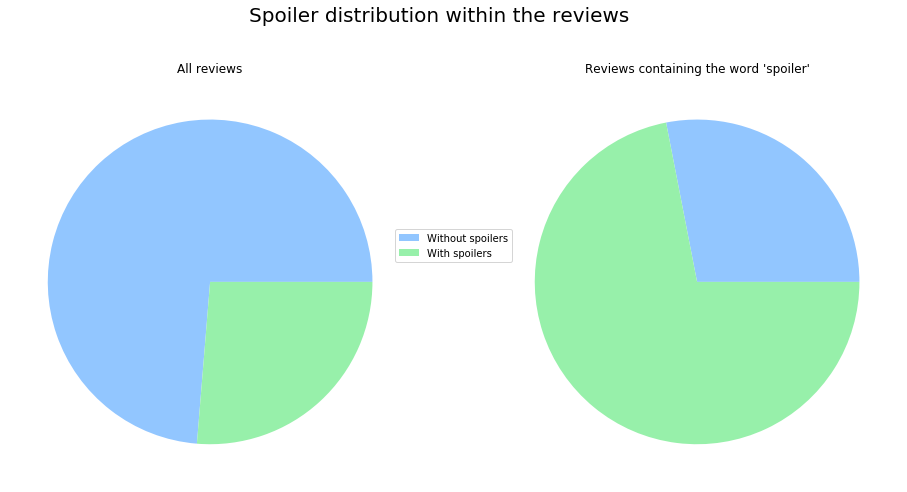

In [22]:
pie1 = reviews_meta['is_spoiler'].value_counts().reset_index().sort_values(by='index')
pie2 = reviews_meta[reviews_meta['has_word_spoiler'] == 1]['is_spoiler'].value_counts().reset_index().sort_values(by='index')

with plt.style.context('seaborn-pastel'):
    fig = plt.figure(figsize=(16, 8))

    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)

    ax1.pie(pie1['is_spoiler'])
    ax1.set_title('All reviews')

    ax2.pie(pie2['is_spoiler'])
    ax2.set_title('Reviews containing the word \'spoiler\'')

    plt.suptitle('Spoiler distribution within the reviews', fontsize=20)
    fig.legend(labels=['Without spoilers', 'With spoilers'], loc='center')
    plt.show()

In [23]:
reviews_meta['word_count'] = df_reviews['review_text'].apply(lambda text: len(text.split(' ')))

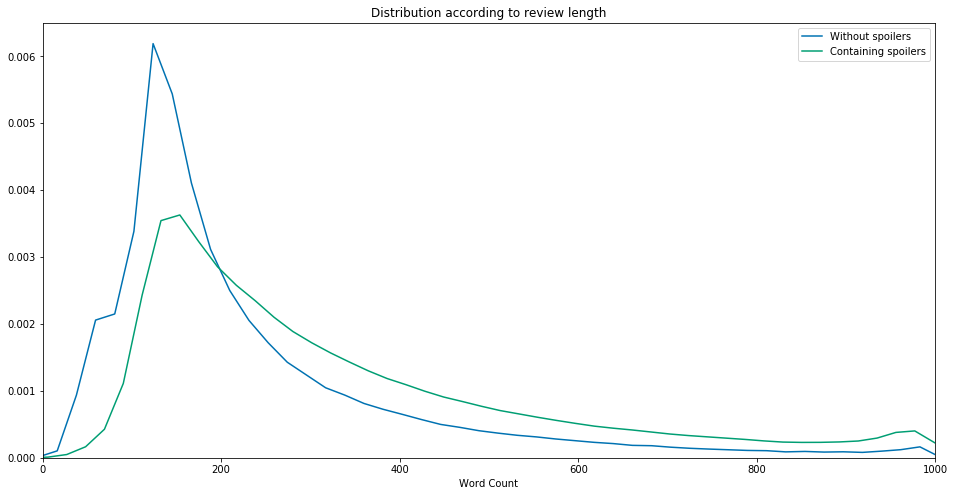

In [24]:
with plt.style.context('seaborn-colorblind'):
    plt.figure(figsize=(16, 8))
    sns.distplot(reviews_meta[reviews_meta['is_spoiler'] == False]['word_count'], hist=False, label='Without spoilers')
    sns.distplot(reviews_meta[reviews_meta['is_spoiler'] == True]['word_count'], hist=False, label='Containing spoilers')
    plt.legend()
    plt.xlim([0, 1000])
    plt.xlabel('Word Count')
    plt.title('Distribution according to review length')
    plt.show()

The Sixth Sense Spoilers

In [25]:
sixthsense = df_reviews[df_reviews['movie_id'] == 'tt0167404']
sixthsense.is_spoiler.value_counts()

False    470
True     127
Name: is_spoiler, dtype: int64

In [26]:
sixthsense_meta = pd.DataFrame()
sixthsense_meta['is_spoiler'] = sixthsense['is_spoiler']
sixthsense_meta['has_word_malcolm'] = sixthsense['review_text'].apply(lambda text: 1 if 'MALCOLM' in text.upper() else 0)
sixthsense_meta['has_word_died'] = sixthsense['review_text'].apply(lambda text: 1 if 'DIED' in text.upper() else 0)
sixthsense_meta['has_word_malcolm_died'] = sixthsense_meta['has_word_malcolm'] & sixthsense_meta['has_word_died']

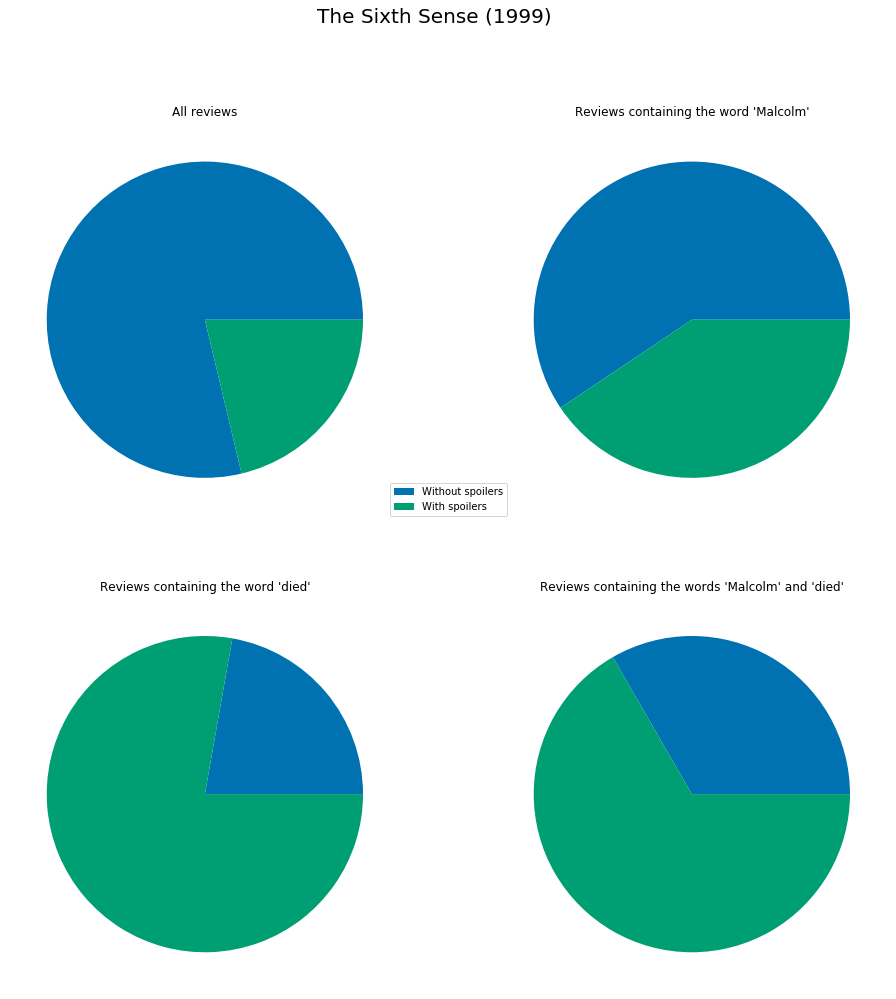

In [27]:
pie1 = sixthsense_meta['is_spoiler'].value_counts().reset_index().sort_values(by='index')
pie2 = sixthsense_meta[sixthsense_meta['has_word_malcolm'] == 1]['is_spoiler'].value_counts().reset_index().sort_values(by='index')
pie3 = sixthsense_meta[sixthsense_meta['has_word_died'] == 1]['is_spoiler'].value_counts().reset_index().sort_values(by='index')
pie4 = sixthsense_meta[sixthsense_meta['has_word_malcolm_died'] == 1]['is_spoiler'].value_counts().reset_index().sort_values(by='index')

with plt.style.context('seaborn-colorblind'):
    fig = plt.figure(figsize=(16, 16))

    ax1 = fig.add_subplot(2, 2, 1)
    ax2 = fig.add_subplot(2, 2, 2)
    ax3 = fig.add_subplot(2, 2, 3)
    ax4 = fig.add_subplot(2, 2, 4)

    ax1.pie(pie1['is_spoiler'])
    ax1.set_title('All reviews')

    ax2.pie(pie2['is_spoiler'])
    ax2.set_title('Reviews containing the word \'Malcolm\'')

    ax3.pie(pie3['is_spoiler'])
    ax3.set_title('Reviews containing the word \'died\'')

    ax4.pie(pie4['is_spoiler'])
    ax4.set_title('Reviews containing the words \'Malcolm\' and \'died\'')

    plt.suptitle('The Sixth Sense (1999)', fontsize=20)
    fig.legend(labels=['Without spoilers', 'With spoilers'], loc='center')

    plt.show()

In [28]:
sixthsense_meta

,is_spoiler,has_word_malcolm,has_word_died,has_word_malcolm_died
75893,True,0,0,0
75894,True,0,0,0
75895,True,1,0,0
75896,True,1,0,0
75897,True,0,0,0
...,...,...,...,...
559694,False,0,0,0
559695,False,0,0,0
559696,False,0,0,0
559697,False,0,0,0


In [29]:
spoiler_ratio = sixthsense_meta.is_spoiler.value_counts()[1] / (sixthsense_meta.is_spoiler.value_counts()[0] + sixthsense_meta.is_spoiler.value_counts()[1])
spoiler_ratio

0.21273031825795644

The percent of spoilers is 21.3%.

In [31]:
sixthsense

,review_date,movie_id,user_id,is_spoiler,review_text,rating,review_summary
75893,27 December 2010,tt0167404,ur23762506,True,The Sixth Sense enjoys being playful with our ...,8,A movie with a gentle but long-lasting impress...
75894,2 February 2007,tt0167404,ur12886680,True,M. Night Shyamalan has created something that ...,10,Loved It
75895,2 February 2005,tt0167404,ur3174947,True,Cole (Haley Joel Osment) is a young boy troubl...,10,It's all in the ending
75896,13 June 2007,tt0167404,ur10123981,True,Cole is keeping a secret from his psychologist...,8,Keeping a secret.
75897,21 June 2007,tt0167404,ur13149501,True,The Sixth Sense is M. Night Shyamalan first bi...,10,I see dead people...walking around like regula...
...,...,...,...,...,...,...,...
559694,9 October 1999,tt0167404,ur0063164,False,"First of all, let me say that I really enjoyed...",9,Not the usual blind praise
559695,9 October 1999,tt0167404,ur0182174,False,I believe the Sixth Sense was researched thoro...,9,"""I ain't 'fraid of no ghosts!"" Until I saw th..."
559696,9 October 1999,tt0167404,ur0437939,False,Just want to say that there's very few films w...,9,one of the most memorable films of all time
559697,8 October 1999,tt0167404,ur0418450,False,I can honestly say that this is one of the bes...,10,Excellent...


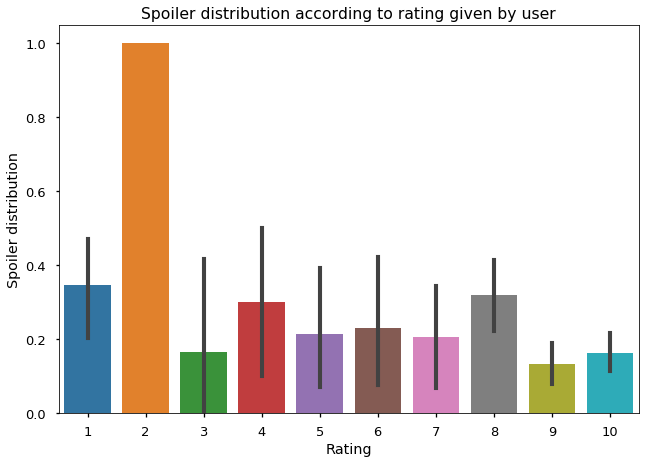

In [45]:
with plt.style.context('seaborn-talk'):
    sns.barplot(data=sixthsense, x='rating', y='is_spoiler')
    plt.title('Spoiler distribution according to rating given by user')
    plt.xlabel('Rating')
    plt.ylabel('Spoiler distribution')
    plt.show()

In [33]:
sixthsense['rating'].value_counts()

10    209
9     127
8      94
1      49
7      29
5      28
6      26
4      20
3      12
2       3
Name: rating, dtype: int64

While it seems that people who gave a movie rating of 2 all contained spoilers, there is a small sample size of 3 people. This movie received extremely high ratings.

In [48]:
sixthsense

,review_date,movie_id,user_id,is_spoiler,review_text,rating,review_summary
75893,27 December 2010,tt0167404,ur23762506,True,The Sixth Sense enjoys being playful with our ...,8,A movie with a gentle but long-lasting impress...
75894,2 February 2007,tt0167404,ur12886680,True,M. Night Shyamalan has created something that ...,10,Loved It
75895,2 February 2005,tt0167404,ur3174947,True,Cole (Haley Joel Osment) is a young boy troubl...,10,It's all in the ending
75896,13 June 2007,tt0167404,ur10123981,True,Cole is keeping a secret from his psychologist...,8,Keeping a secret.
75897,21 June 2007,tt0167404,ur13149501,True,The Sixth Sense is M. Night Shyamalan first bi...,10,I see dead people...walking around like regula...
...,...,...,...,...,...,...,...
559694,9 October 1999,tt0167404,ur0063164,False,"First of all, let me say that I really enjoyed...",9,Not the usual blind praise
559695,9 October 1999,tt0167404,ur0182174,False,I believe the Sixth Sense was researched thoro...,9,"""I ain't 'fraid of no ghosts!"" Until I saw th..."
559696,9 October 1999,tt0167404,ur0437939,False,Just want to say that there's very few films w...,9,one of the most memorable films of all time
559697,8 October 1999,tt0167404,ur0418450,False,I can honestly say that this is one of the bes...,10,Excellent...


In [59]:
sixthsense_meta

,is_spoiler,has_word_malcolm,has_word_died,has_word_malcolm_died,word_count
75893,True,0,0,0,168
75894,True,0,0,0,139
75895,True,1,0,0,235
75896,True,1,0,0,123
75897,True,0,0,0,539
...,...,...,...,...,...
559694,False,0,0,0,229
559695,False,0,0,0,318
559696,False,0,0,0,90
559697,False,0,0,0,42


In [55]:
sixthsense_meta['word_count'] = sixthsense['review_text'].apply(lambda text: len(text.split(' ')))

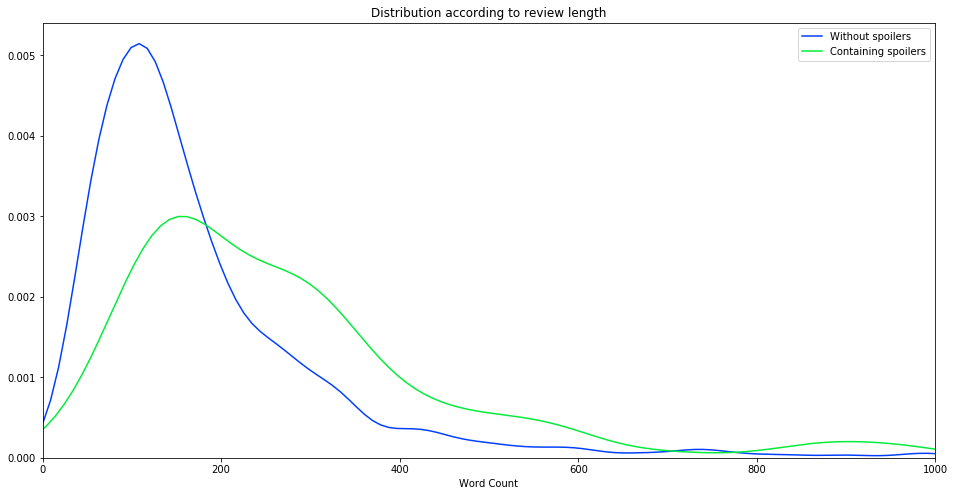

In [88]:
with plt.style.context('seaborn-bright'):
    plt.figure(figsize=(16, 8))
    sns.distplot(sixthsense_meta[sixthsense_meta['is_spoiler'] == False]['word_count'], hist=False, label='Without spoilers')
    sns.distplot(sixthsense_meta[sixthsense_meta['is_spoiler'] == True]['word_count'], hist=False, label='Containing spoilers')
    plt.legend()
    plt.xlim([0, 1000])
    plt.xlabel('Word Count')
    plt.title('Distribution according to review length')
    plt.show()

In [61]:
from scipy import stats

In [68]:
word_count_false = sixthsense_meta[sixthsense_meta['is_spoiler'] == False]

In [70]:
word_count_true = sixthsense_meta[sixthsense_meta['is_spoiler'] == True]

In [71]:
stats.ttest_ind(word_count_false['word_count'], word_count_true['word_count'])

Ttest_indResult(statistic=-6.269385684311674, pvalue=6.967784508970205e-10)

In [74]:
word_count_false['word_count'].mean()

178.2

In [75]:
word_count_true['word_count'].mean()

274.01574803149606

There is a statistically significant difference between the word counts of reviews that have spoilers in them. They tend to be longer.